<a href="https://colab.research.google.com/github/alexeylazarev13/da_homeworks/blob/main/project_da_15_09_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import io
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import *
%matplotlib inline
plt.style.use('ggplot')
import json
import warnings
warnings.filterwarnings('ignore')
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

In [3]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/csv/wiki_movie_plots_deduped.csv')

Mounted at /content/drive


In [4]:
df.head(3)


,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."


**Быстрый анализ датасета с помощью sweetviz:**

In [ ]:
!pip install sweetviz

In [ ]:
import sweetviz as sv
my_report = sv.analyze(df)

In [7]:
my_report.show_html('SWEETVIZ_REPORT.html')

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



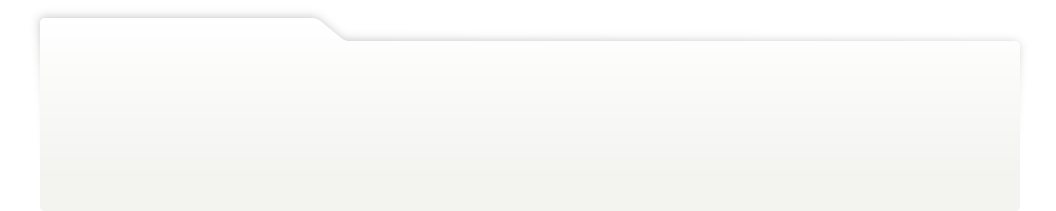
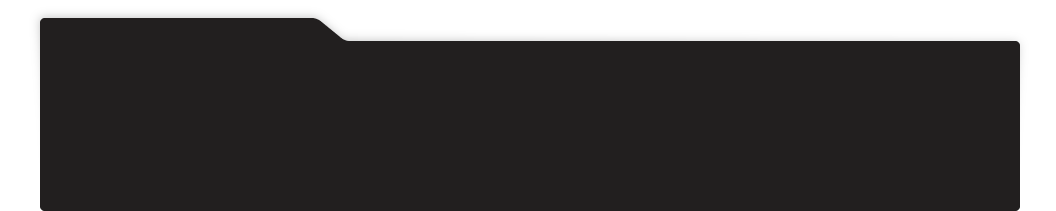
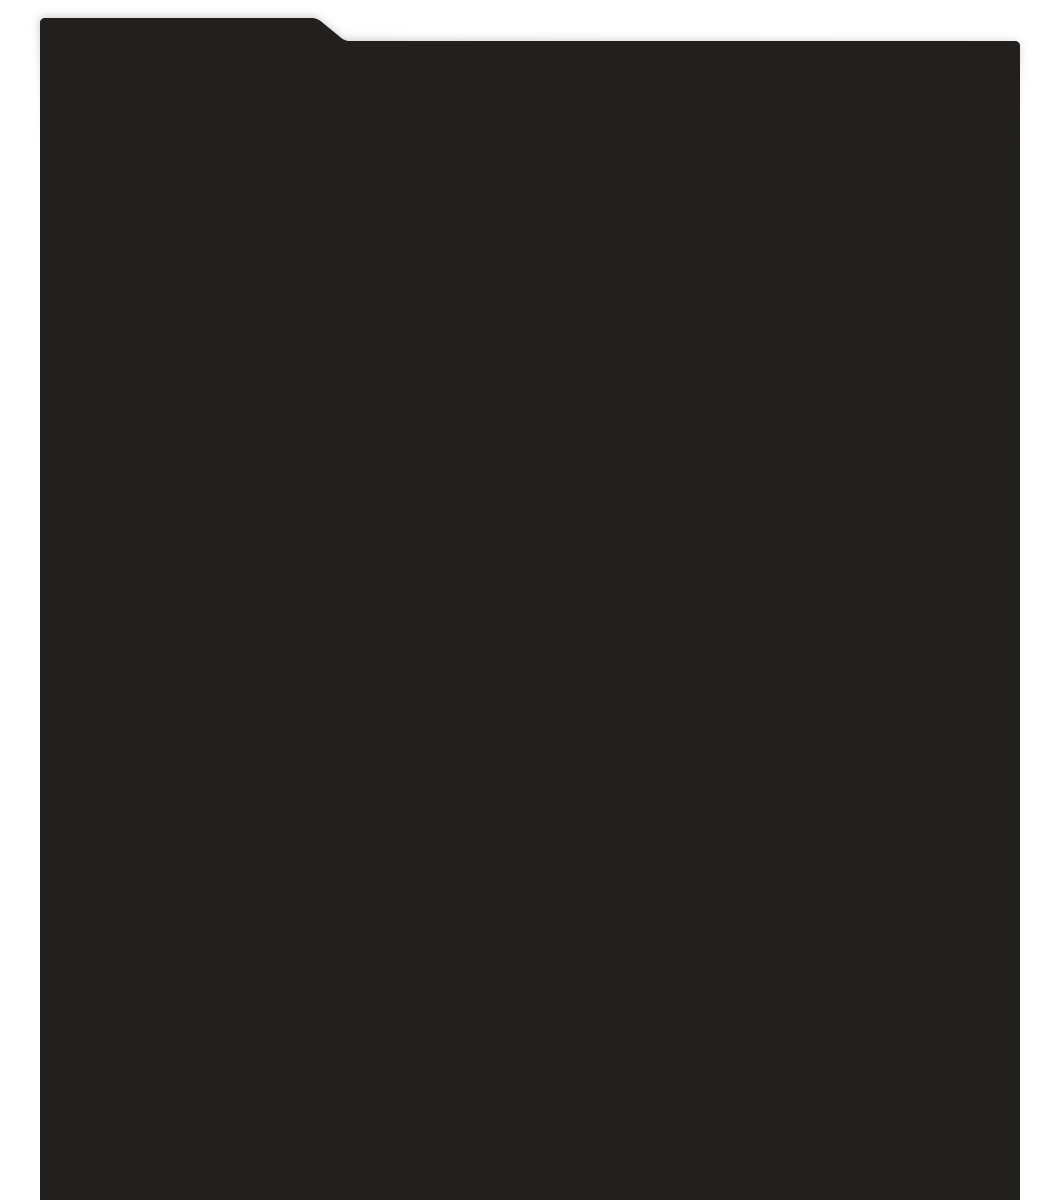
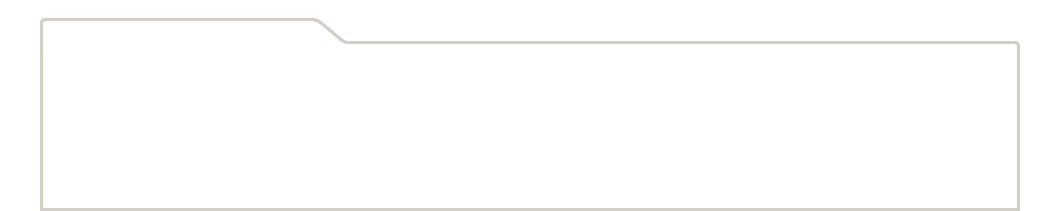
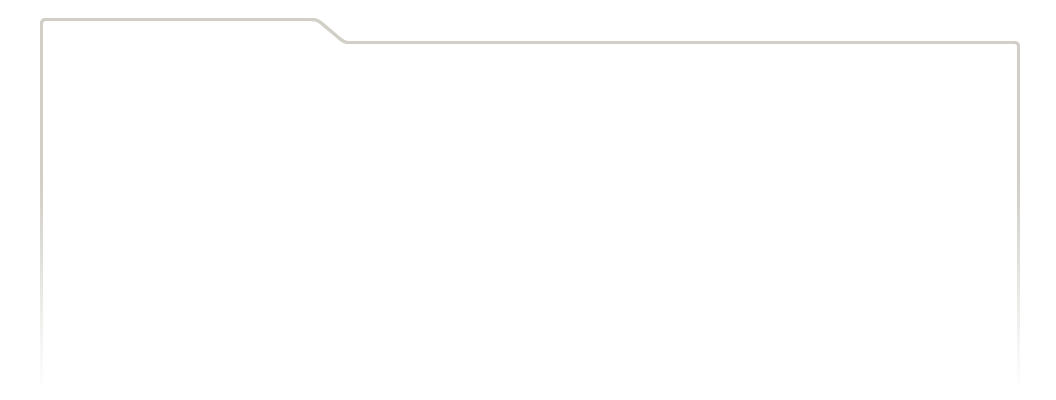
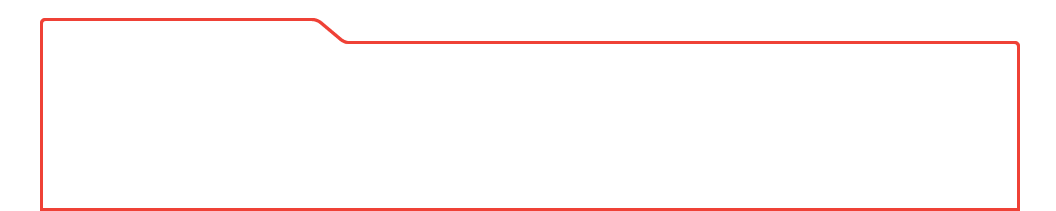
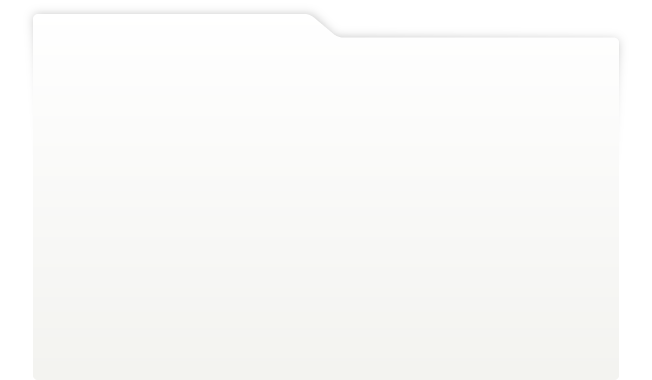
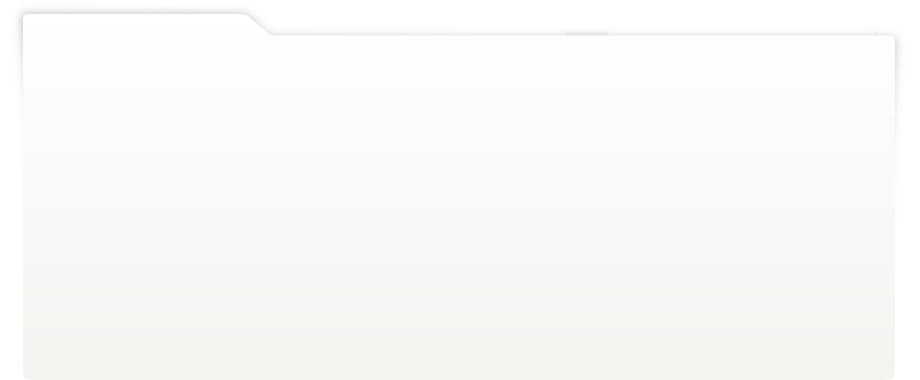
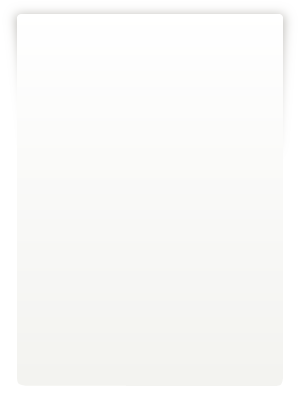
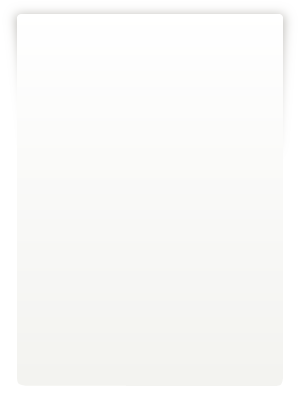
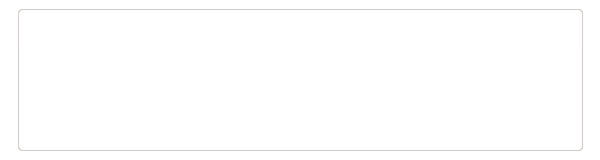
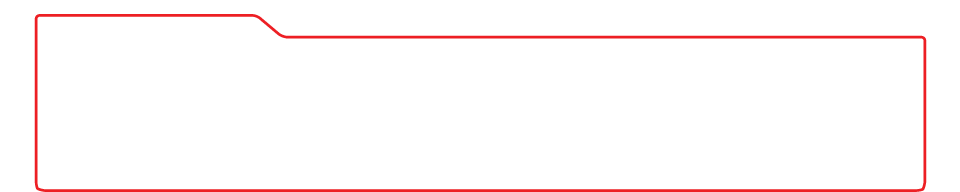
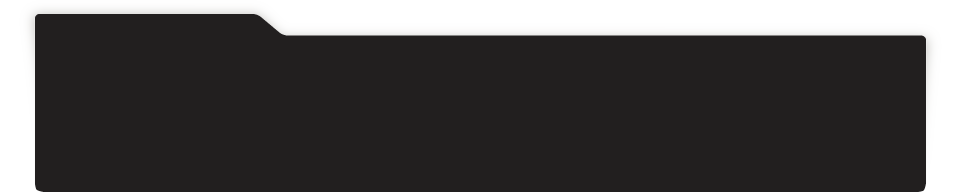
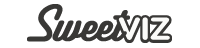
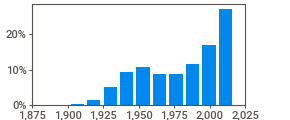
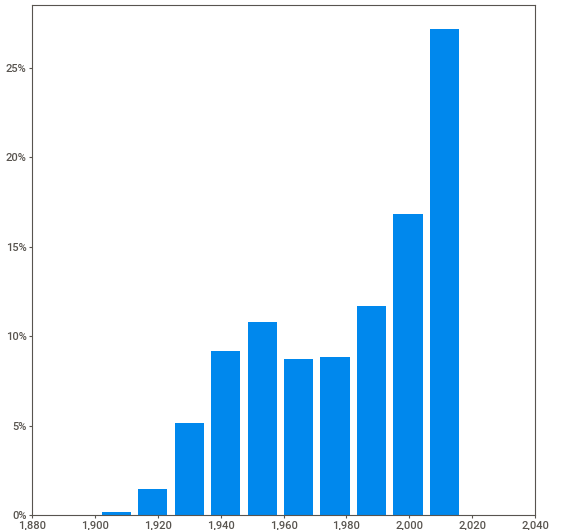
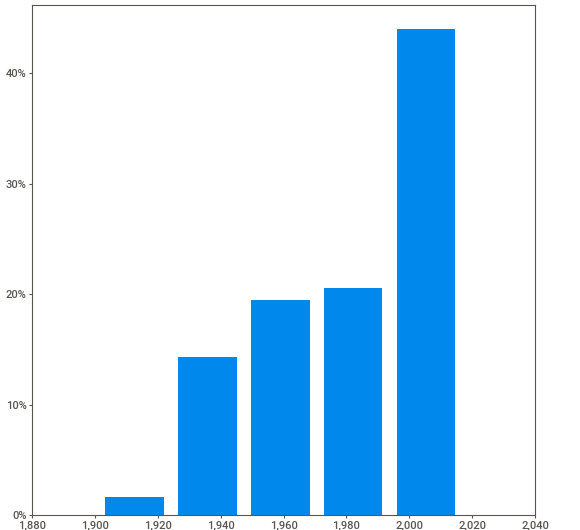
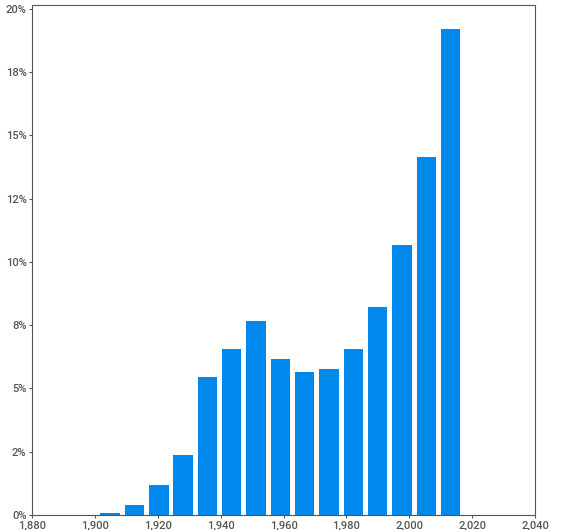
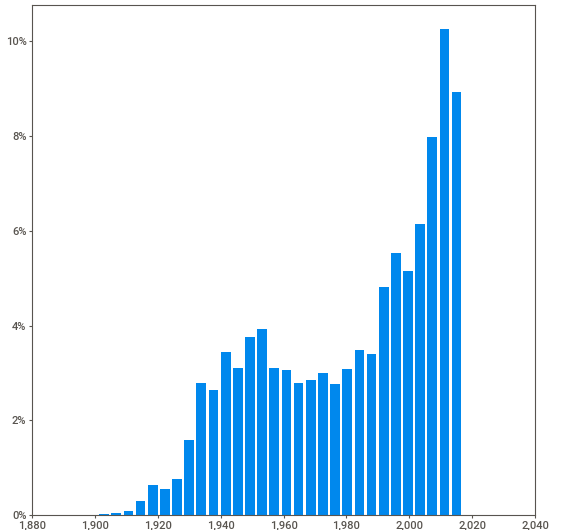
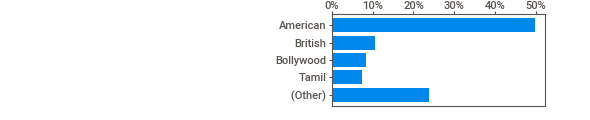
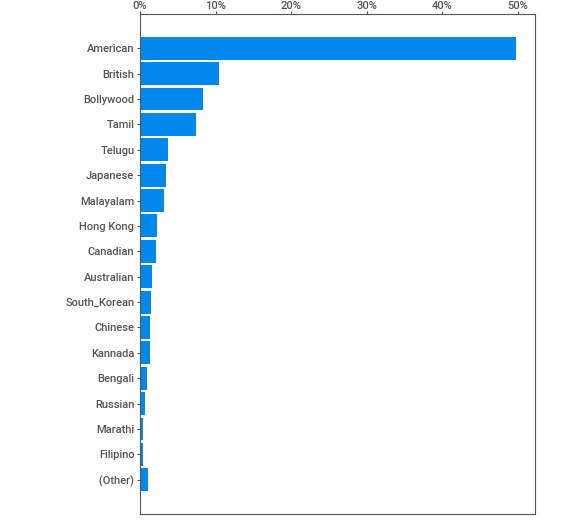
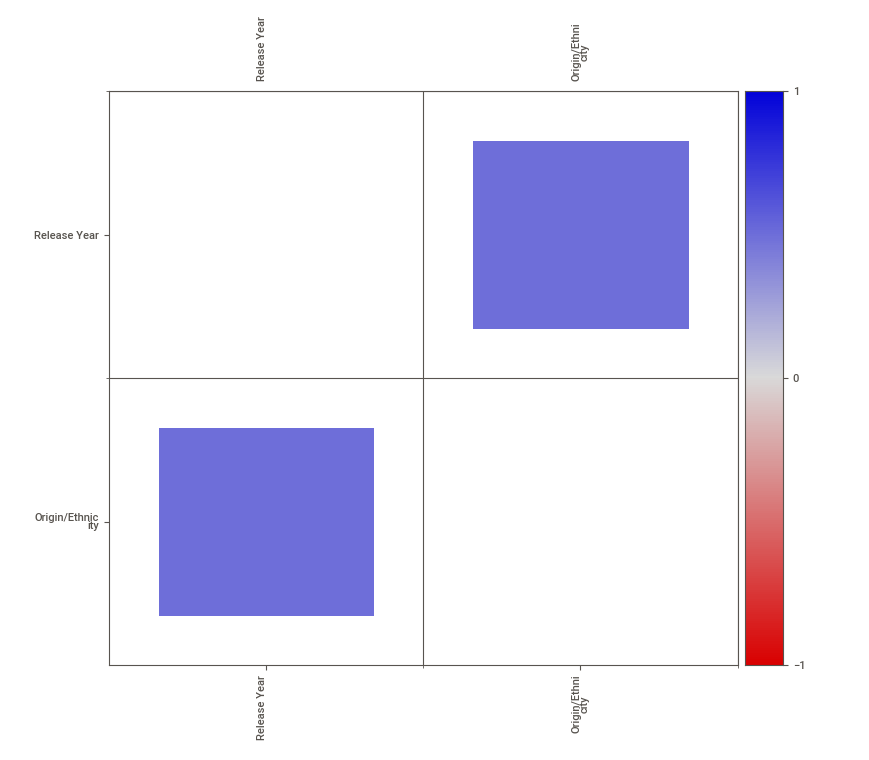
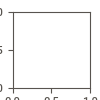

In [280]:
import IPython
IPython.display.HTML(filename='SWEETVIZ_REPORT.html')

**1. Подготовьте гистограммы по самым популярным жанрам, режиссерам, нац. принадлежностям фильмов, годам**

**1.1 Гистограмма по самым популярных жанрам:**

In [9]:
genre_counts = df["Genre"].value_counts().head(11)
genre_counts


unknown      6083
drama        5964
comedy       4379
horror       1167
action       1098
thriller      966
romance       923
western       865
crime         568
adventure     526
musical       467
Name: Genre, dtype: int64

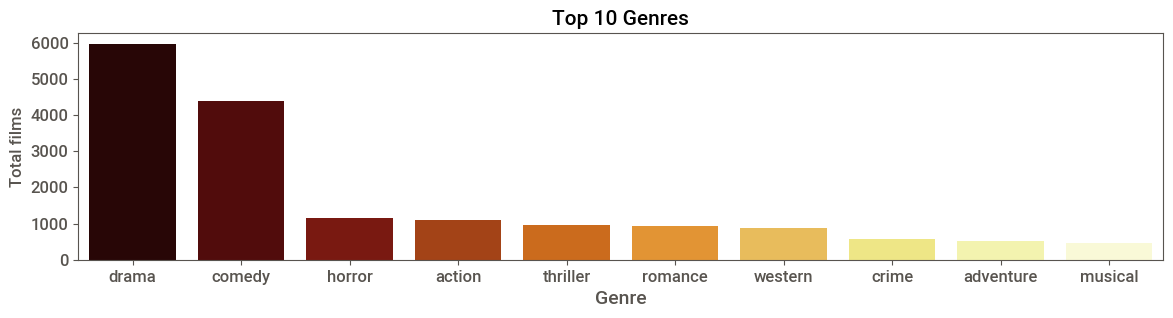

In [10]:
genre_counts = df["Genre"].value_counts().head(11)
genre_counts_without_unknown =  genre_counts[['drama', 'comedy', 'horror', 'action', 'thriller', 'romance', 'western', 'crime', 'adventure', 'musical']]
new_genre_counts_without_unknown = genre_counts_without_unknown.reset_index()
new_genre_counts_without_unknown.rename(columns={'index': 'genre', 'Genre': 'count'}, inplace=True)
plt.subplots(figsize=(14,3))
sns.barplot(y=new_genre_counts_without_unknown['count'],x=new_genre_counts_without_unknown['genre'],data=new_genre_counts_without_unknown,palette='afmhot')
plt.xticks(fontsize=12)# Установить размер шрифта шкалы
plt.yticks(fontsize=12)
plt.xlabel('Genre',fontsize=14)
plt.ylabel('Total films',fontsize=12)
plt.title('Top 10 Genres',fontsize=15)
plt.show()

**1.2 Гистограмма по самым популярных режиссерам:**

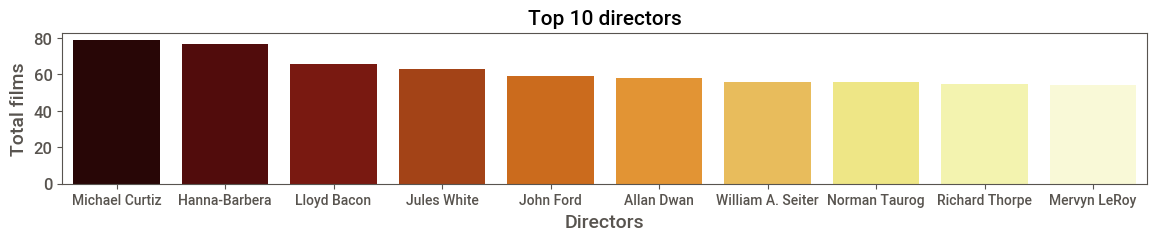

In [11]:
director_counts = df["Director"].value_counts().head(11)
director_counts_without_unknown =  director_counts[['Michael Curtiz', 'Hanna-Barbera', 'Lloyd Bacon', 'Jules White', 'John Ford', 'Allan Dwan', 'William A. Seiter', 'Norman Taurog', 'Richard Thorpe', 'Mervyn LeRoy']]
new_director_counts_without_unknown = director_counts_without_unknown.reset_index()
new_director_counts_without_unknown.rename(columns={'index': 'director', 'Director': 'count'}, inplace=True)
plt.subplots(figsize=(14,2))
sns.barplot(y=new_director_counts_without_unknown['count'],x=new_director_counts_without_unknown['director'],data=new_director_counts_without_unknown,palette='afmhot')
plt.xticks(fontsize=10)# Установить размер шрифта шкалы
plt.yticks(fontsize=12)
plt.xlabel('Directors',fontsize=14)
plt.ylabel('Total films',fontsize=14)
plt.title('Top 10 directors',fontsize=15)
plt.show()


**1.3 Гистограмма по самым популярных нац. принадлежностям фильмов:**

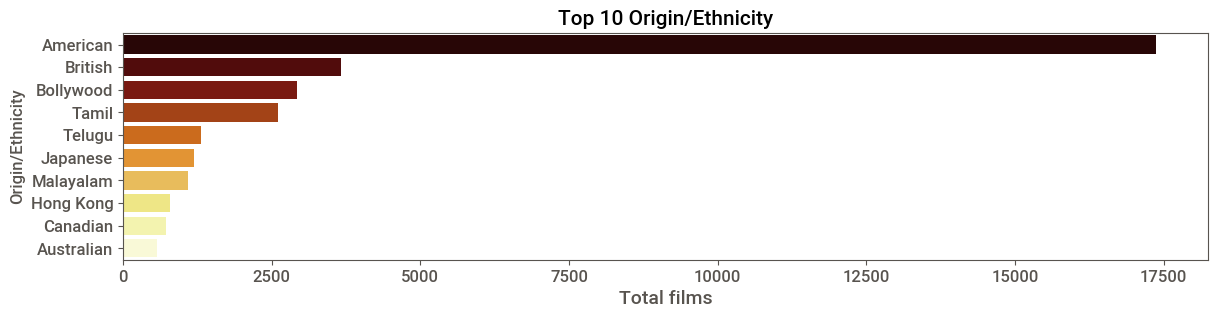

In [12]:
origin_counts = df["Origin/Ethnicity"].value_counts().head(10)
origin_counts =  origin_counts[['American', 'British', 'Bollywood', 'Tamil', 'Telugu', 'Japanese', 'Malayalam', 'Hong Kong', 'Canadian', 'Australian']]
origin_counts_wo_index = origin_counts.reset_index()
origin_counts_wo_index.rename(columns={'index': 'origin', 'Origin/Ethnicity': 'count'}, inplace=True)

plt.subplots(figsize=(14,3))
sns.barplot(y=origin_counts_wo_index['origin'],x=origin_counts_wo_index['count'],data=origin_counts_wo_index,palette='afmhot')
plt.xticks(fontsize=12)# Установить размер шрифта шкалы
plt.yticks(fontsize=12)
plt.xlabel('Total films',fontsize=14)
plt.ylabel('Origin/Ethnicity',fontsize=12)
plt.title('Top 10 Origin/Ethnicity',fontsize=15)
plt.show()

**1.4 Гистограмма по самым популярным годам производства фильмов:**

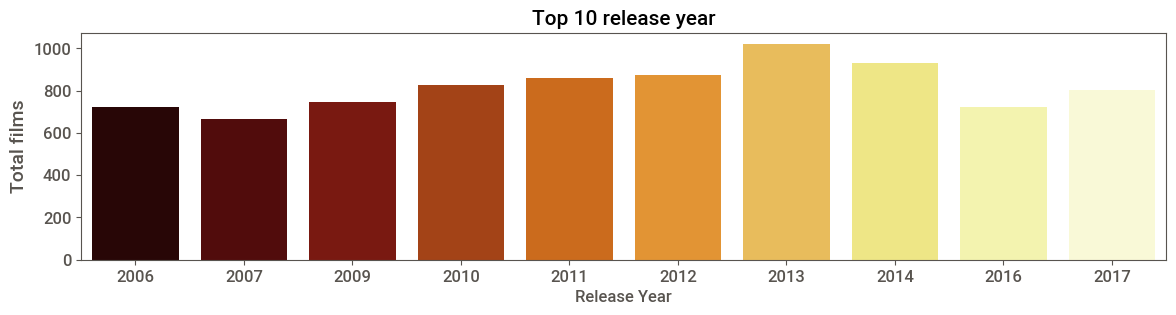

In [13]:
release_year_counts = df["Release Year"].value_counts().head(10)
release_year_counts_wo_index = release_year_counts.reset_index()
release_year_counts_wo_index.rename(columns={'index': 'release year', 'Release Year': 'count'}, inplace=True)
plt.subplots(figsize=(14,3))
sns.barplot(y=release_year_counts_wo_index['count'],x=release_year_counts_wo_index['release year'],data=release_year_counts_wo_index,palette='afmhot')
plt.xticks(fontsize=12)# Установить размер шрифта шкалы
plt.yticks(fontsize=12)
plt.xlabel('Release Year',fontsize=12)
plt.ylabel('Total films',fontsize=14)
plt.title('Top 10 release year',fontsize=15)
plt.show()


**2. Sentiment analysis по отзывам (используя  nltk.classify) и оценка, как распределяется sentiment по актерам, режиссерам и жанрам**

In [14]:
df.head(3)

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."


**Чистим данные:**

In [15]:
from sklearn.model_selection import train_test_split

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output

In [16]:
df_copy = df.copy()

In [17]:
df_copy.head(3)

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."


**Перевод в нижний регистр:**

In [18]:
df_copy['Plot'] = df_copy['Plot'].str.lower()
df_copy.head(3)

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"a bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"the moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"the film, just over a minute long, is composed..."


**Удаление знаков препинания:**

In [19]:
df_copy["Plot_replace"] = df_copy['Plot'].str.replace('[^\w\s]','')
#df = df.drop('column_name', axis=1)
df_copy.head(3)

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,Plot_replace
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"a bartender is working at a saloon, serving dr...",a bartender is working at a saloon serving dri...
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"the moon, painted with a smiling face hangs ov...",the moon painted with a smiling face hangs ove...
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"the film, just over a minute long, is composed...",the film just over a minute long is composed o...


**Удаление стоп-слов:**

In [20]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
stopWords=set(stopwords.words('english'))
print(stopWords)

{'under', 'about', 'no', 'myself', 'all', "you've", 'should', 'we', 'other', 'himself', 'couldn', 'such', 'but', 'too', 'same', 'can', 'didn', 'your', 'yours', 'of', 'up', "isn't", 'in', 'isn', 'any', 'have', 'has', 'at', 'until', 'after', 'both', 'aren', 'mustn', 'very', 'here', 'only', 'to', 'each', "couldn't", 'a', 'where', 'against', 'this', "needn't", "should've", 'm', 'above', 'been', 'on', 'was', 'i', 'her', 'once', 'there', 'd', 'll', 'before', 'through', 'having', 'who', 'does', 'being', 'as', 'am', 'down', "aren't", "haven't", "mustn't", 'o', 'doesn', 'its', 'for', 'why', 'itself', 'by', "it's", "you'll", 'shan', 'doing', 'hasn', 'needn', 'y', "won't", 'some', 'those', 'not', 'now', 'out', 'will', 've', 'she', 'few', 'just', 'hadn', 'hers', 'further', 'below', 'our', 'that', 'wouldn', "don't", "wouldn't", 'is', 'into', 'and', "mightn't", 'had', 'theirs', 'they', "shan't", "wasn't", 'were', "you'd", 'during', 'ma', 'again', 'the', 's', 'their', 'don', 'yourself', 'over', 'did'

In [ ]:
!pip install texthero

In [ ]:
!pip install -U spacy

In [25]:
import texthero as hero

In [26]:
df_copy["Plot_replace_without_stopwords"] = hero.remove_stopwords(df_copy['Plot_replace'])
df_copy['Plot_replace_without_stopwords'].head(3)

0     bartender  working   saloon serving drinks  c...
1     moon painted   smiling face hangs   park  nig...
2     film    minute long  composed  two shots   fi...
Name: Plot_replace_without_stopwords, dtype: object

**Оценка как распределяется sentiment по жанрам:**

In [240]:
data = df_copy[['Title','Plot_replace_without_stopwords', 'Genre', 'Director']]
data.head(3)

,Title,Plot_replace_without_stopwords,Genre,Director
0,Kansas Saloon Smashers,bartender working saloon serving drinks c...,unknown,Unknown
1,Love by the Light of the Moon,moon painted smiling face hangs park nig...,unknown,Unknown
2,The Martyred Presidents,film minute long composed two shots fi...,unknown,Unknown


**Попробуем Vader для анализа текста:**

In [28]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [29]:
nltk.download('vader_lexicon')
vader = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [241]:
data['scores'] = data['Plot_replace_without_stopwords'].apply(lambda Plot_replace_without_stopwords: vader.polarity_scores(Plot_replace_without_stopwords))
data.head(3)

,Title,Plot_replace_without_stopwords,Genre,Director,scores
0,Kansas Saloon Smashers,bartender working saloon serving drinks c...,unknown,Unknown,"{'neg': 0.117, 'neu': 0.883, 'pos': 0.0, 'comp..."
1,Love by the Light of the Moon,moon painted smiling face hangs park nig...,unknown,Unknown,"{'neg': 0.039, 'neu': 0.705, 'pos': 0.256, 'co..."
2,The Martyred Presidents,film minute long composed two shots fi...,unknown,Unknown,"{'neg': 0.128, 'neu': 0.802, 'pos': 0.07, 'com..."


In [244]:
data['compound'] = data['scores'].apply(lambda score_dict: score_dict['compound'])
data.head(3)

,Title,Plot_replace_without_stopwords,Genre,Director,scores,compound
0,Kansas Saloon Smashers,bartender working saloon serving drinks c...,unknown,Unknown,"{'neg': 0.117, 'neu': 0.883, 'pos': 0.0, 'comp...",-0.7269
1,Love by the Light of the Moon,moon painted smiling face hangs park nig...,unknown,Unknown,"{'neg': 0.039, 'neu': 0.705, 'pos': 0.256, 'co...",0.8934
2,The Martyred Presidents,film minute long composed two shots fi...,unknown,Unknown,"{'neg': 0.128, 'neu': 0.802, 'pos': 0.07, 'com...",-0.4215


In [245]:
data['sentiment'] = data['compound'].apply(lambda c: 'pos' if c>=0 else 'neg')
data.head(3)

,Title,Plot_replace_without_stopwords,Genre,Director,scores,compound,sentiment
0,Kansas Saloon Smashers,bartender working saloon serving drinks c...,unknown,Unknown,"{'neg': 0.117, 'neu': 0.883, 'pos': 0.0, 'comp...",-0.7269,neg
1,Love by the Light of the Moon,moon painted smiling face hangs park nig...,unknown,Unknown,"{'neg': 0.039, 'neu': 0.705, 'pos': 0.256, 'co...",0.8934,pos
2,The Martyred Presidents,film minute long composed two shots fi...,unknown,Unknown,"{'neg': 0.128, 'neu': 0.802, 'pos': 0.07, 'com...",-0.4215,neg


In [ ]:
#from sklearn.metrics import accuracy_score
#потом можно будет сравнить результаты оценки разными способами

**Уберем те строки, где жанр неизвестен:**

In [246]:
data_copy = data[data['Genre'] != 'unknown']
data_copy.head(3)

,Title,Plot_replace_without_stopwords,Genre,Director,scores,compound,sentiment
6,The Great Train Robbery,film opens two bandits breaking railroad t...,western,Edwin S. Porter,"{'neg': 0.206, 'neu': 0.683, 'pos': 0.111, 'co...",-0.9349,neg
7,The Suburbanite,film family move suburbs hoping quiet...,comedy,Wallace McCutcheon,"{'neg': 0.346, 'neu': 0.551, 'pos': 0.103, 'co...",-0.7650,neg
10,Dream of a Rarebit Fiend,rarebit fiend gorges welsh rarebit restaur...,short,Wallace McCutcheon and Edwin S. Porter,"{'neg': 0.067, 'neu': 0.832, 'pos': 0.102, 'co...",0.4939,pos


In [247]:
data_copy = data[data['Director'] != 'Unknown']
data_copy.head(3)

,Title,Plot_replace_without_stopwords,Genre,Director,scores,compound,sentiment
4,Jack and the Beanstalk,earliest known adaptation classic fairytale...,unknown,"George S. Fleming, Edwin S. Porter","{'neg': 0.138, 'neu': 0.73, 'pos': 0.132, 'com...",-0.3612,neg
5,Alice in Wonderland,alice follows large white rabbit rabbithole...,unknown,Cecil Hepworth,"{'neg': 0.102, 'neu': 0.786, 'pos': 0.112, 'co...",-0.1779,neg
6,The Great Train Robbery,film opens two bandits breaking railroad t...,western,Edwin S. Porter,"{'neg': 0.206, 'neu': 0.683, 'pos': 0.111, 'co...",-0.9349,neg


In [248]:
data_copy_index = data_copy['Genre'].value_counts('sentiment').head(10)
data_copy_index

drama        0.174812
unknown      0.159854
comedy       0.128813
horror       0.034092
action       0.031989
thriller     0.028434
romance      0.027072
western      0.025621
crime        0.016794
adventure    0.015580
Name: Genre, dtype: float64

In [249]:
data_copy_index2 = data_copy['Director'].value_counts('sentiment').head(10)
data_copy_index2

Michael Curtiz       0.002340
Hanna-Barbera        0.002281
Lloyd Bacon          0.001955
Jules White          0.001866
John Ford            0.001748
Allan Dwan           0.001718
Norman Taurog        0.001659
William A. Seiter    0.001659
Richard Thorpe       0.001629
Mervyn LeRoy         0.001599
Name: Director, dtype: float64

In [37]:
data_copy_without_index = data_copy_index.reset_index()
data_copy_without_index.head(3)

,index,Genre
0,drama,0.174812
1,unknown,0.159854
2,comedy,0.128813


In [38]:
data_copy_without_index = data_copy_index.reset_index()
data_copy_without_index.head(3)

,index,Genre
0,drama,0.174812
1,unknown,0.159854
2,comedy,0.128813


In [39]:
data_copy_without_index2 = data_copy_index2.reset_index()
data_copy_without_index2.head(3)

,index,Director
0,Michael Curtiz,0.002340
1,Hanna-Barbera,0.002281
2,Lloyd Bacon,0.001955


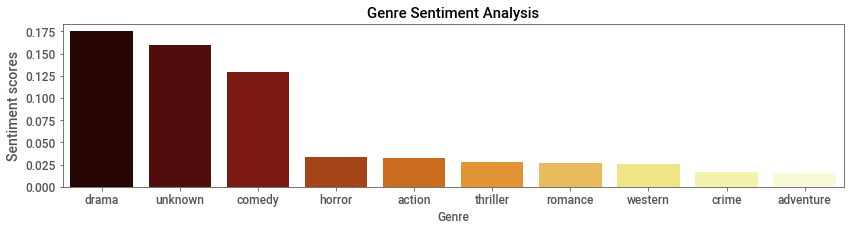

In [40]:
plt.subplots(figsize=(14,3))
sns.barplot(y=data_copy_without_index['Genre'],x=data_copy_without_index['index'],data=data_copy_without_index,palette='afmhot')
plt.xticks(fontsize=12)# Установить размер шрифта шкалы
plt.yticks(fontsize=12)
plt.xlabel('Genre',fontsize=12)
plt.ylabel('Sentiment scores',fontsize=14)
plt.title('Genre Sentiment Analysis',fontsize=15)
plt.show()

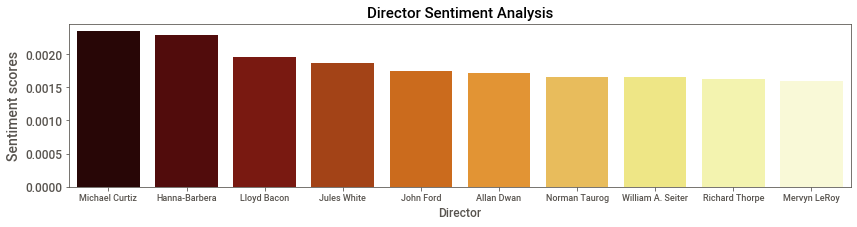

In [41]:
plt.subplots(figsize=(14,3))
sns.barplot(y=data_copy_without_index2['Director'],x=data_copy_without_index2['index'],data=data_copy_without_index2,palette='afmhot')
plt.xticks(fontsize=9)# Установить размер шрифта шкалы
plt.yticks(fontsize=12)
plt.xlabel('Director',fontsize=12)
plt.ylabel('Sentiment scores',fontsize=14)
plt.title('Director Sentiment Analysis',fontsize=15)
plt.show()

**Вернемся к условию и nltk.classify.**

In [42]:
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import movie_reviews

In [43]:
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


True

In [44]:
def extract_features(word_list):
  return dict([(word, True) for word in word_list])

In [45]:
if __name__== '__main__':
  positive_fileids = movie_reviews.fileids('pos')
  negative_fileids = movie_reviews.fileids('neg')

In [46]:
features_positive = [(extract_features(movie_reviews.words(fileids=[f])), 
           'Positive') for f in positive_fileids]
features_negative = [(extract_features(movie_reviews.words(fileids=[f])), 
           'Negative') for f in negative_fileids]

In [47]:
threshold_factor = 0.8
threshold_positive = int(threshold_factor * len(features_positive))
threshold_negative = int(threshold_factor * len(features_negative))

In [48]:
features_train = features_positive[:threshold_positive] + features_negative[:threshold_negative]
features_test = features_positive[threshold_positive:] + features_negative[threshold_negative:]
print('\nNumber of training datapoints:', len(features_train))
print("Number of test datapoints:", len(features_test))


Number of training datapoints: 1600
Number of test datapoints: 400


In [49]:
classifier = NaiveBayesClassifier.train(features_train)
print("Accuracy of the classifier:", nltk.classify.util.accuracy(classifier, features_test))

Accuracy of the classifier: 0.735


In [250]:
input = data_copy.copy()

In [ ]:
input_reviews = input[:20]
input_reviews.head(20)

In [ ]:
#print("\nPredictions:")
for review in input_reviews['Plot_replace_without_stopwords']:
  #print("\nReview:", review)
  probdist = classifier.prob_classify(extract_features(review.split()))
  pred_sentiment = probdist.max()

  print(pred_sentiment) 


In [257]:
finish = input_reviews[['Title', 'sentiment']]

In [264]:
finish.reset_index(drop=True, inplace=True)

In [268]:
finish.head(3)

,Title,sentiment
0,Jack and the Beanstalk,neg
1,Alice in Wonderland,neg
2,The Great Train Robbery,neg


In [269]:
finish.rename(columns = {'Title' : 'title', 'sentiment' : 'sentiment_nltk_vader'}, inplace = True)

In [270]:
finish.head(3)

,title,sentiment_nltk_vader
0,Jack and the Beanstalk,neg
1,Alice in Wonderland,neg
2,The Great Train Robbery,neg


In [272]:
finish["sentiment_nltk_classify"] = ['pos','pos','neg','pos','pos','pos','neg','neg','pos','pos','neg','pos','pos','pos','pos','pos','pos','pos','pos','pos']

In [273]:
finish

,title,sentiment_nltk_vader,sentiment_nltk_classify
0,Jack and the Beanstalk,neg,pos
1,Alice in Wonderland,neg,pos
2,The Great Train Robbery,neg,neg
3,The Suburbanite,neg,pos
4,The Little Train Robbery,pos,pos
5,The Night Before Christmas,pos,pos
6,Dream of a Rarebit Fiend,pos,neg
7,From Leadville to Aspen: A Hold-Up in the Rockies,neg,neg
8,Kathleen Mavourneen,neg,pos
9,Daniel Boone,neg,pos
